<a href="https://colab.research.google.com/github/OliverZarate/Regresi-n-No-Lineal/blob/main/Actividad_6_(Regresi%C3%B3n_No_Lineal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 6 (Regresión No Lineal)
##Oliver Zárate Palafox A01610960


In [804]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [805]:
df = pd.read_csv('/content/cuentas_credicel.csv', encoding='ISO-8859-1')
df.head(5)

<ipython-input-805-17aa1e4b3410>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/cuentas_credicel.csv', encoding='ISO-8859-1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [806]:
columnas_a_mantener = ["riesgo", "score_buro", "porc_eng", "limite_credito", "costo_total" ]
df2 = df[columnas_a_mantener]

In [807]:
valores_nulos=df2.isnull().sum()
valores_nulos

riesgo            0
score_buro        0
porc_eng          0
limite_credito    0
costo_total       0
dtype: int64

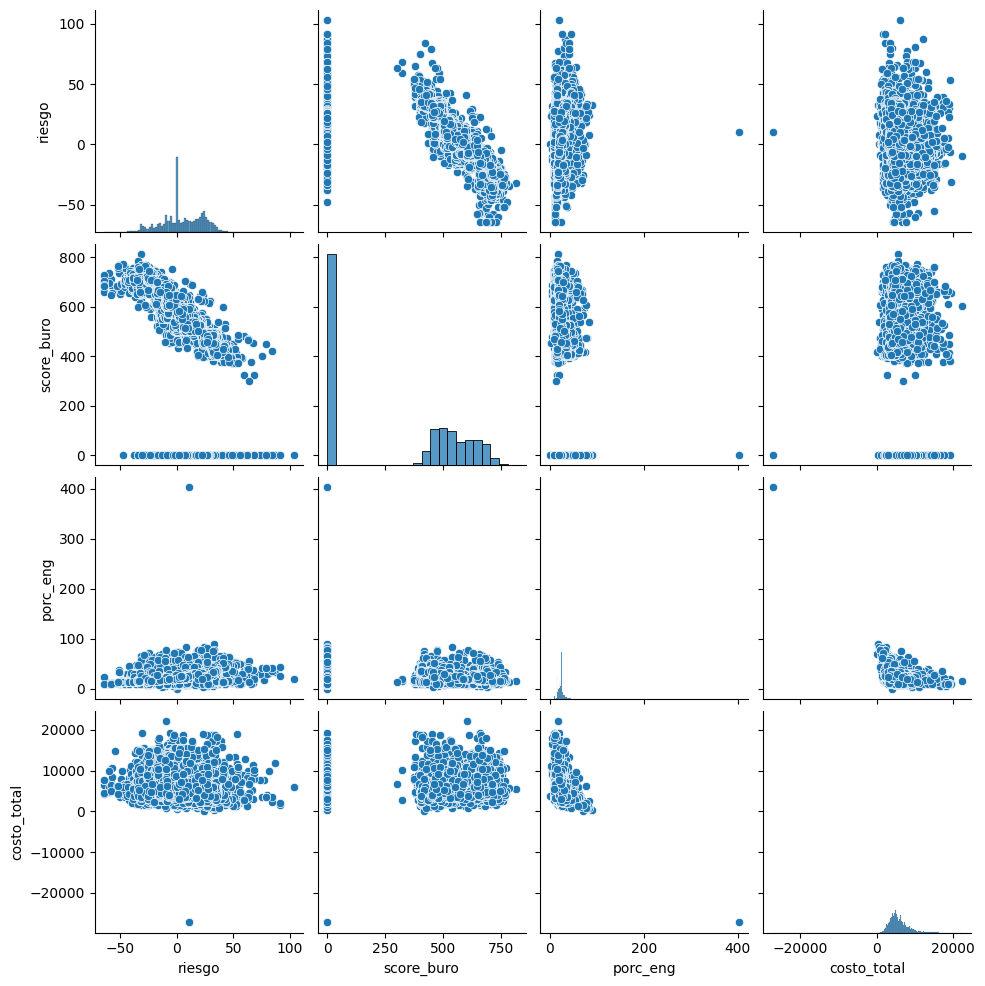

In [808]:
sns.pairplot(df2)

In [809]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   riesgo          22735 non-null  float64
 1   score_buro      22735 non-null  int64  
 2   porc_eng        22735 non-null  float64
 3   limite_credito  22735 non-null  object 
 4   costo_total     22735 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 888.2+ KB


In [810]:
df2['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce', downcast='integer')


<ipython-input-810-9374ecaa46ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce', downcast='integer')


In [811]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   riesgo          22735 non-null  float64
 1   score_buro      22735 non-null  int64  
 2   porc_eng        22735 non-null  float64
 3   limite_credito  22733 non-null  float64
 4   costo_total     22735 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 888.2 KB


In [812]:
valores_nulos=df2.isnull().sum()
valores_nulos

riesgo            0
score_buro        0
porc_eng          0
limite_credito    2
costo_total       0
dtype: int64

In [813]:
df2['limite_credito'].fillna(df2['limite_credito'].mean(), inplace=True)

<ipython-input-813-8529f50cecae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['limite_credito'].fillna(df2['limite_credito'].mean(), inplace=True)


In [814]:
valores_nulos=df2.isnull().sum()
valores_nulos

riesgo            0
score_buro        0
porc_eng          0
limite_credito    0
costo_total       0
dtype: int64

#Modelos de Riesgo vs costo total
##modelo 1

In [815]:
Vars_Indep= df2[['costo_total']]
Var_Dep= df2["riesgo"]

In [816]:
x= Vars_Indep
y= Var_Dep

In [817]:
def  func1 (x, a, b, c):
  return  a*x**2 + b*x + c

In [818]:
parametros, covs= curve_fit(func1, df2["costo_total"], df2["riesgo"])

In [819]:
parametros

array([-5.52980989e-09, -1.19948493e-03,  1.23137957e+01])

In [820]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c

In [821]:
yfit1

,costo_total
0,9.763154
1,8.757991
2,9.635926
3,9.635926
4,3.720482
...,...
22730,5.566995
22731,5.926948
22732,4.085040
22733,-6.996432


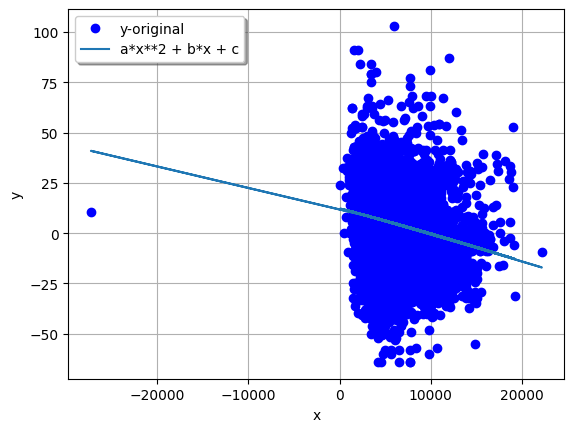

In [822]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [823]:
R21 = r2_score(y, yfit1)
R21

0.029506479198763924

In [824]:
corr1= np.sqrt(abs(R21))
corr1

0.17177450101445185

##modelo 2

In [825]:
Vars_Indep= df2[['costo_total']]
Var_Dep= df2["riesgo"]
x= Vars_Indep
y= Var_Dep

In [826]:
def  func1 (x, a, b, c):
  return 1/a*x

parametros, covs= curve_fit(func1, df["costo_total"], df["riesgo"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([1.67821149e+03, 1.00000000e+00, 1.00000000e+00])

In [827]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x
yfit1

,costo_total
0,1.254907
1,1.742927
2,1.316878
3,1.316878
4,4.136547
...,...
22730,3.268956
22731,3.098537
22732,3.966127
22733,8.970264


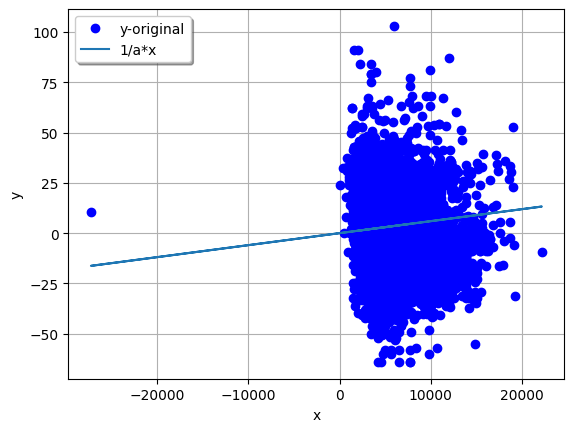

In [828]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [829]:
R22 = r2_score(y, yfit1)
R22

-0.045092461853176946

In [830]:
corr2= np.sqrt(abs(R22))
corr2

0.21234985720074537

##modelo 3

In [831]:
Vars_Indep= df2[['costo_total']]
Var_Dep= df2["riesgo"]
x= Vars_Indep
y= Var_Dep

In [832]:
def  func1 (x, a, b, c):
  return a*x + b*x + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["riesgo"])
parametros

array([141.43856614, -70.71898513, -70.71898513])

In [833]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x
yfit1

,costo_total
0,1.254907
1,1.742927
2,1.316878
3,1.316878
4,4.136547
...,...
22730,3.268956
22731,3.098537
22732,3.966127
22733,8.970264


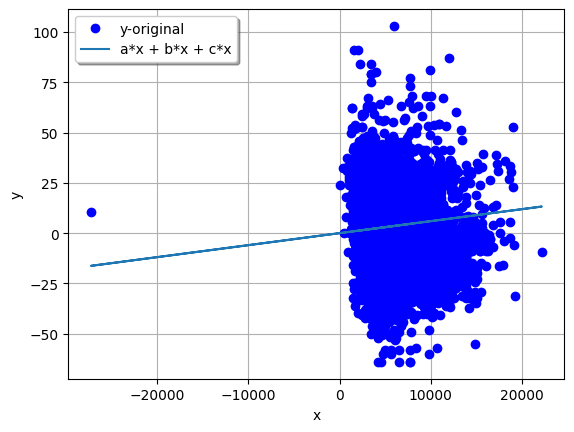

In [834]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [835]:
R23 = r2_score(y, yfit1)
R23


-0.04509246185314275

In [836]:
corr3= np.sqrt(abs(R23))
corr3

0.21234985720066485

##modelo 4

In [837]:
Vars_Indep= df2[['costo_total']]
Var_Dep= df2["riesgo"]
x= Vars_Indep
y= Var_Dep

In [838]:
def  func1 (x, a, b, c):
  return 1/a*x**8

parametros, covs= curve_fit(func1, df2["costo_total"], df2["riesgo"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([8.17170412e+18, 1.00000000e+00, 1.00000000e+00])

In [839]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**8
yfit1

,costo_total
0,0.435177
1,0.367704
2,0.082561
3,0.082561
4,-0.122945
...,...
22730,0.461148
22731,0.327210
22732,0.000000
22733,0.859796


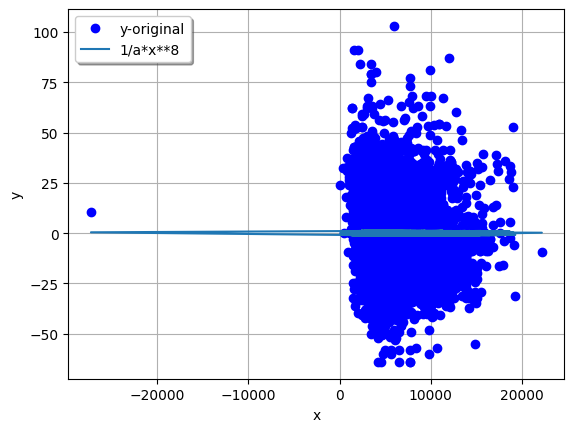

In [840]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x**8")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [841]:
R24 = r2_score(y, yfit1)
R24

-0.08681796666792829

In [842]:
corr4= np.sqrt(abs(R24))
corr4

0.2946488870977257

##modelo 5

In [843]:
Vars_Indep= df2[['costo_total']]
Var_Dep= df2["riesgo"]
x= Vars_Indep
y= Var_Dep

In [844]:
def  func1 (x, a, b, c):
  return (a*x**9 + b)/ c*x

parametros, covs= curve_fit(func1, df["costo_total"], df["riesgo"])
parametros

array([1.81733018e-14, 1.00932198e+06, 1.68470524e+09])

In [845]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["riesgo"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**9 + b)/ c*x
yfit1

,costo_total
0,1.258197
1,2.014497
2,1.248300
3,1.248300
4,4.042437
...,...
22730,2.957178
22731,2.848392
22732,3.987669
22733,8.322839


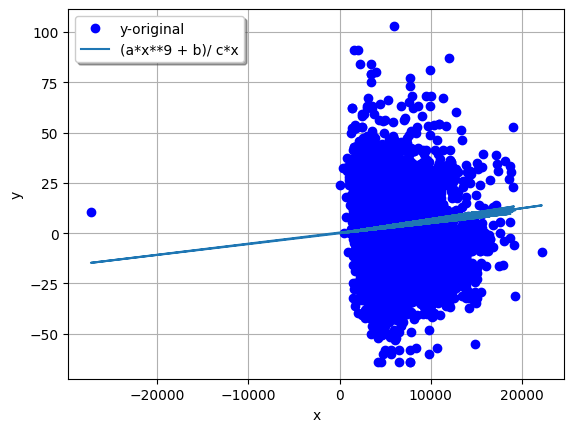

In [846]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**9 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [847]:
R25 = r2_score(y, yfit1)
R25

-0.04469658686402078

In [848]:
corr5= np.sqrt(abs(R25))
corr5

0.2114156731749583

#Modelos de score_buro  vs costo total
##modelo 1

In [849]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["score_buro"]
x= Vars_Indep
y= Var_Dep

In [850]:
def  func1 (x, a, b, c):
  return a*np.sin(x) + b

parametros, covs= curve_fit(func1, df2["costo_total"], df2["score_buro"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([  7.51404308, 289.93945811,   1.        ])

In [851]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.sin(x) + b
yfit1

,costo_total
0,296.744589
1,288.614635
2,282.471186
3,282.471186
4,283.962346
...,...
22730,295.219798
22731,285.307828
22732,296.399860
22733,286.258191


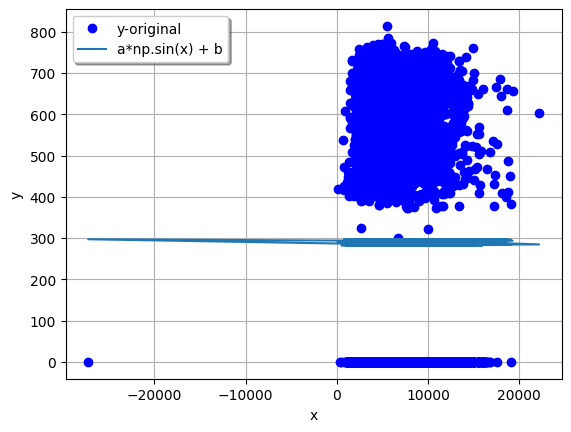

In [852]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.sin(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [853]:
R26 = r2_score(y, yfit1)
R26

0.0003449356133315984

In [854]:
corr6= np.sqrt(abs(R26))
corr6

0.018572442309281737

##modelo 2

In [855]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["score_buro"]
x= Vars_Indep
y= Var_Dep

In [856]:
def  func1 (x, a, b, c):
  return a*np.tan(x) + b

parametros, covs= curve_fit(func1, df2["costo_total"], df2["score_buro"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([1.51718358e-01, 2.89930414e+02, 1.00000000e+00])

In [857]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b
yfit1

,costo_total
0,290.254470
1,289.957590
2,291.298689
3,291.298689
4,289.731265
...,...
22730,290.080271
22731,290.049177
22732,289.674977
22733,289.845151


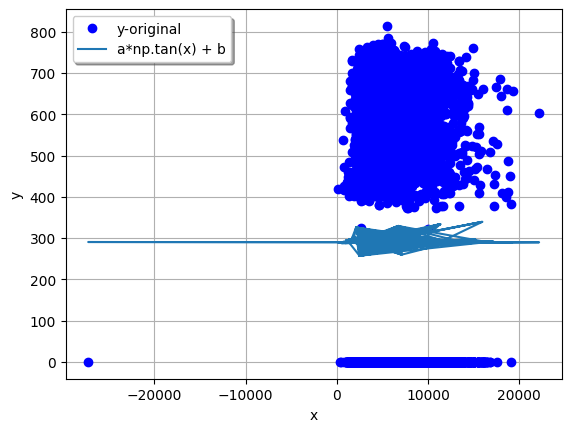

In [858]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [859]:
R27= r2_score(y, yfit1)
R27

0.00012033095770358493

In [860]:
corr7= np.sqrt(abs(R27))
corr7

0.010969546832188872

##modelo 3

In [861]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["score_buro"]
x= Vars_Indep
y= Var_Dep

In [862]:
def  func1 (x, a, b, c):
  return a*np.abs(x) + b*x + c

parametros, covs= curve_fit(func1, df2["costo_total"], df2["score_buro"])
parametros

array([-1.00090222e-03,  8.13872520e-03,  2.49272558e+02])

In [863]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c
yfit1

,costo_total
0,264.304814
1,270.150691
2,265.047147
3,265.047147
4,298.823326
...,...
22730,288.430655
22731,286.389238
22732,296.781908
22733,356.725346


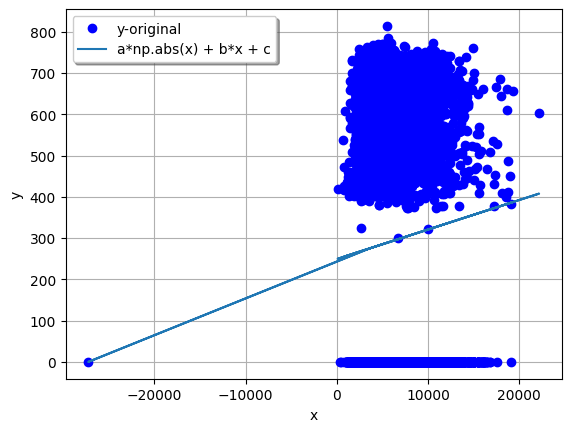

In [864]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [865]:
R28 = r2_score(y, yfit1)
R28

0.0036110978044703312

In [866]:
corr8= np.sqrt(abs(R28))
corr8

0.060092410539687384

##modelo 4

In [867]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["score_buro"]
x= Vars_Indep
y= Var_Dep

In [868]:
def  func1 (x, a, b, c):
  return a/b*x**2 + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["score_buro"])
parametros

array([-6.55056034e-05,  1.44347851e+01,  7.95992129e-02])

In [869]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x
yfit1

,costo_total
0,147.508673
1,194.001946
2,153.750029
3,153.750029
4,333.883495
...,...
22730,300.103601
22731,291.207359
22732,328.766677
22733,169.863144


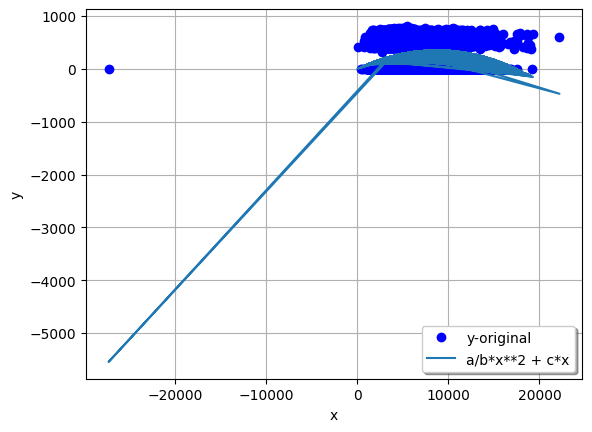

In [870]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [871]:
R29 = r2_score(y, yfit1)
R29

-0.010627135382099251

In [872]:
corr9= np.sqrt(abs(R29))
corr9

0.1030879982446999

##modelo 5

In [873]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["score_buro"]
x= Vars_Indep
y= Var_Dep

In [874]:
def  func1 (x, a, b, c):
  return a/b*x**6 + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["score_buro"])
parametros

array([-1.88081592e-15,  1.20967339e+03,  4.43253087e-02])

In [875]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["score_buro"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**6 + c*x
yfit1

,costo_total
0,101.102612
1,131.095183
2,88.899082
3,88.899082
4,302.121426
...,...
22730,248.960043
22731,237.177275
22732,304.188205
22733,657.080664


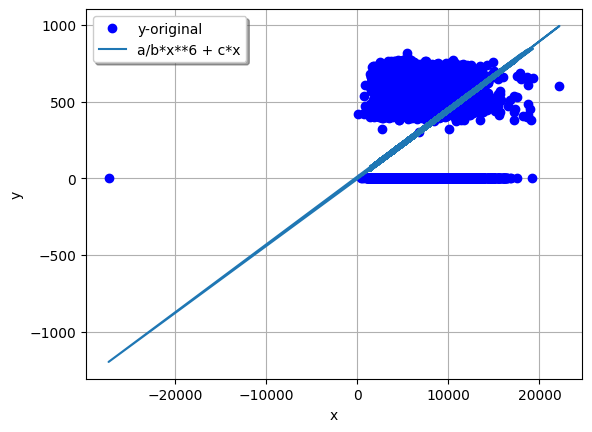

In [876]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**6 + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [877]:
R210 = r2_score(y, yfit1)
R210

-0.11034333853552747

In [878]:
corr10= np.sqrt(abs(R210))
corr10

0.3321796780893248

#Modelos de porc_eng  vs costo total
##modelo 1

In [879]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["porc_eng"]
x= Vars_Indep
y= Var_Dep

In [880]:
def  func1 (x, a, b, c):
  return 1/a*x**5

parametros, covs= curve_fit(func1, df2["costo_total"], df2["porc_eng"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([7.54769412e+17, 1.00000000e+00, 1.00000000e+00])

In [881]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**5
yfit1

,costo_total
0,0.054888
1,0.283671
2,0.069847
3,0.069847
4,-3.079869
...,...
22730,6.583620
22731,5.037353
22732,-7.132023
22733,-2.147320


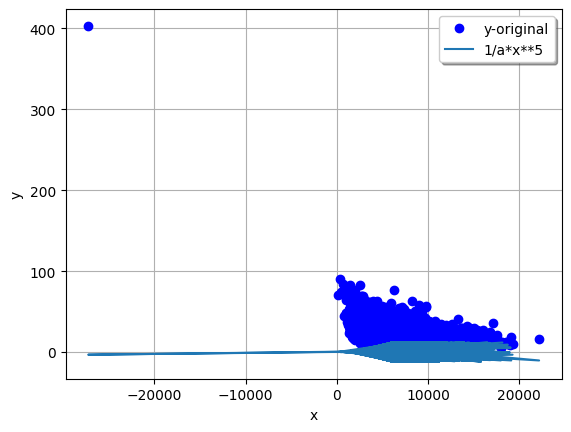

In [882]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x**5")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [883]:
R211 = r2_score(y, yfit1)
R211

-8.986189796555411

In [884]:
corr11= np.sqrt(abs(R211))
corr11

2.9976974157768845

##modelo 2

In [885]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["porc_eng"]
x= Vars_Indep
y= Var_Dep

In [886]:
def  func1 (x, a, b, c):
  return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, df2["costo_total"], df2["porc_eng"])
parametros

array([ 1.71584518e-07, -3.34057919e-03,  3.56963914e+01])

In [887]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,costo_total
0,29.422149
1,27.393210
2,29.151747
3,29.151747
4,20.774983
...,...
22730,22.534015
22731,22.965025
22732,21.063091
22733,24.292296


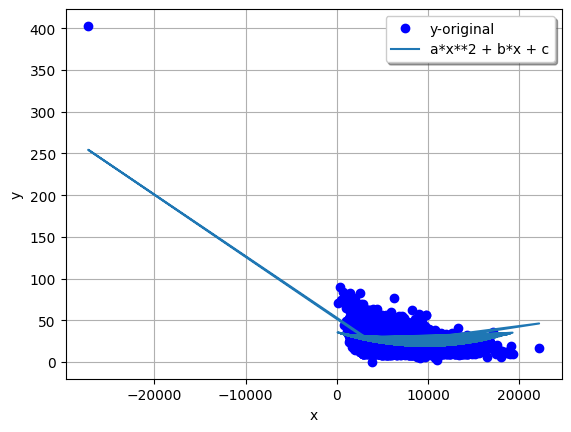

In [888]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [889]:
R212 = r2_score(y, yfit1)
R212

0.1694873474459223

In [890]:
corr12= np.sqrt(abs(R212))
corr12

0.4116884106286237

##modelo 3

In [891]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["porc_eng"]
x= Vars_Indep
y= Var_Dep

In [892]:
def  func1 (x, a, b, c):
  return (a*x**2 + b)/ c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["porc_eng"])
parametros

array([-1.20948150e-09,  2.61930408e-01,  5.31419071e+01])

In [893]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x
yfit1

,costo_total
0,10.167647
1,13.847432
2,10.647176
3,10.647176
4,26.602274
...,...
22730,23.282105
22731,22.430045
22732,26.095437
22733,-3.446323


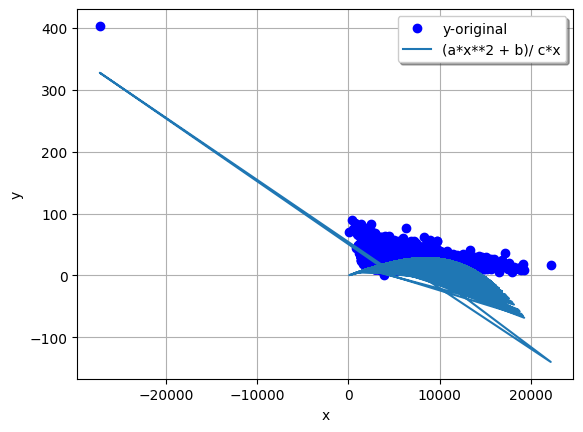

In [894]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [895]:
R213 = r2_score(y, yfit1)
R213

-0.8161130508017898

In [896]:
corr13= np.sqrt(abs(R213))
corr13

0.9033897557542867

##modelo 4

In [897]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["porc_eng"]
x= Vars_Indep
y= Var_Dep

In [898]:
def  func1 (x, a, b, c):
  return a*x + b*x + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["porc_eng"])
parametros

array([-141.42025103,   70.71178609,   70.71178609])

In [899]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x
yfit1

,costo_total
0,6.994349
1,9.714374
2,7.339749
3,7.339749
4,23.055447
...,...
22730,18.219848
22731,17.269998
22732,22.105597
22733,49.996644


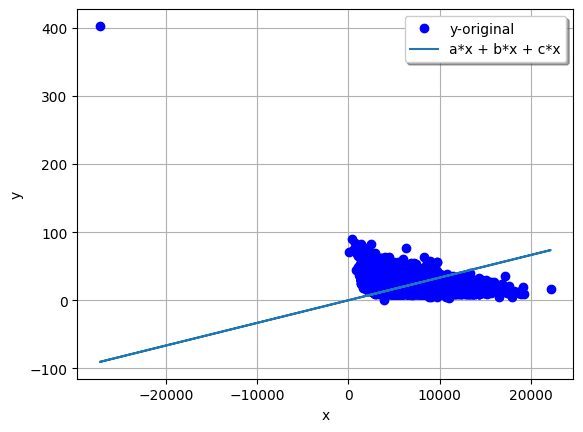

In [900]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [901]:
R214 = r2_score(y, yfit1)
R214

-2.0873024320905462

In [902]:
corr14= np.sqrt(abs(R214))
corr14

1.4447499548678124

##modelo 5

In [903]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["porc_eng"]
x= Vars_Indep
y= Var_Dep

In [904]:
def  func1 (x, a, b, c):
  return 1/a*x**2

parametros, covs= curve_fit(func1, df2["costo_total"], df2["porc_eng"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([3.22980169e+06, 1.00000000e+00, 1.00000000e+00])

In [905]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["porc_eng"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2
yfit1

,costo_total
0,1.373222
1,2.648963
2,1.512198
3,1.512198
4,14.920843
...,...
22730,9.318280
22731,8.372031
22732,13.716736
22733,70.166201


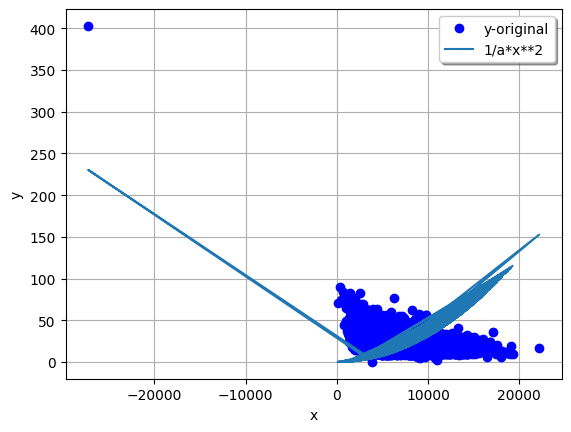

In [906]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [907]:
R215 = r2_score(y, yfit1)
R215

-4.976666926828025

In [908]:
corr15= np.sqrt(abs(R215))
corr15

2.2308444425436806

#Modelos de limite_crédito  vs costo total
##modelo 1

In [909]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["limite_credito"]
x= Vars_Indep
y= Var_Dep

In [910]:
def  func1 (x, a, b, c):
  return a/b*x**2 + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["limite_credito"])
parametros

array([-2.07806285e-04,  3.13713540e+00,  1.43286498e+00])

In [911]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x
yfit1

,costo_total
0,2723.820165
1,3624.398814
2,2843.105023
3,2843.105023
4,6754.715292
...,...
22730,5867.101867
22731,5659.747281
22732,6602.528143
22733,6558.671395


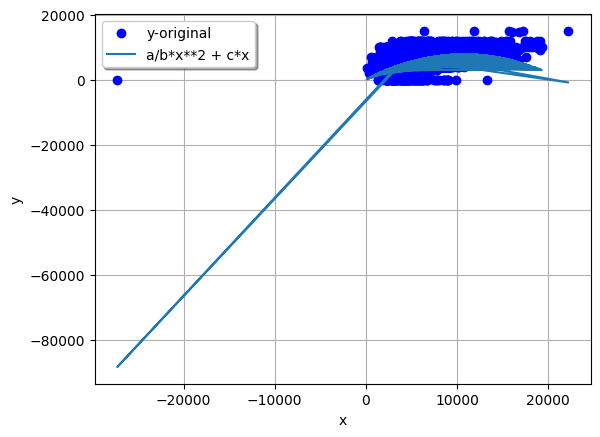

In [912]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [913]:
R216 = r2_score(y, yfit1)
R216

-0.24546353291405487

In [914]:
corr16= np.sqrt(abs(R216))
corr16

0.49544276451882396

##modelo 2

In [915]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["limite_credito"]
x= Vars_Indep
y= Var_Dep

In [917]:
def  func1 (x, a, b, c):
  return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, df2["costo_total"], df2["limite_credito"])
parametros

array([1.32472051e-05, 4.80892501e-02, 5.14045195e+03])

In [918]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c
yfit1

,costo_total
0,5300.482391
1,5394.451125
2,5311.429867
3,5311.429867
4,6112.688406
...,...
22730,5802.960057
22731,5748.720476
22732,6047.416129
22733,8866.507766


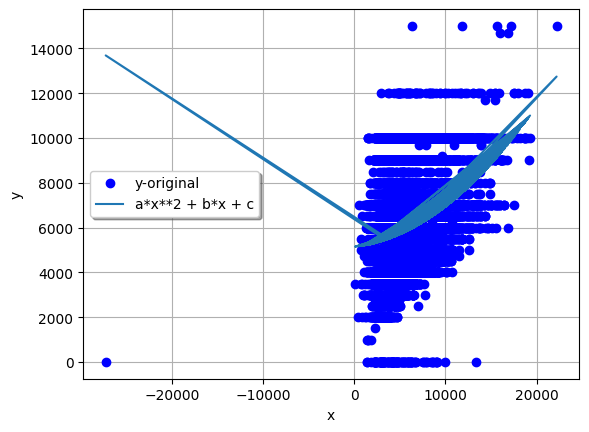

In [920]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [921]:
R217 = r2_score(y, yfit1)
R217

0.07255944535069236

In [922]:
corr17= np.sqrt(abs(R217))
corr17

0.2693686049833803

##modelo 3

In [923]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["limite_credito"]
x= Vars_Indep
y= Var_Dep

In [924]:
def  func1 (x, a, b, c):
  return a*x + b*x + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["limite_credito"])
parametros

array([-141.11522675,   71.01680761,   71.01680761])

In [925]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x + b*x + c*x
yfit1

,costo_total
0,1934.126097
1,2686.286246
2,2029.638497
3,2029.638497
4,6375.452690
...,...
22730,5038.279092
22731,4775.619992
22732,6112.793590
22733,13825.419878


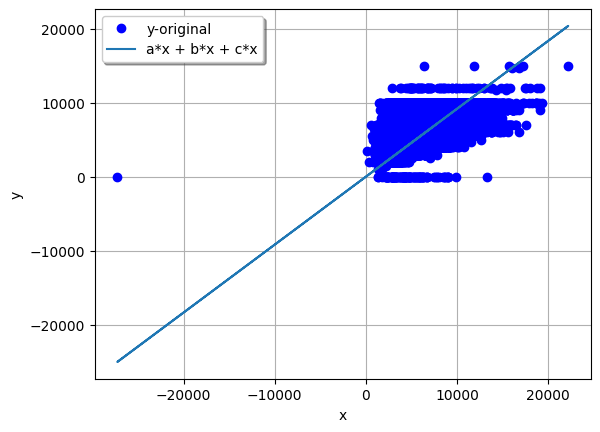

In [926]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*x + b*x + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [927]:
R218 = r2_score(y, yfit1)
R218

-0.6240268366372652

In [928]:
corr18= np.sqrt(abs(R218))
corr18

0.7899536927170258

##modelo 4

In [929]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["limite_credito"]
x= Vars_Indep
y= Var_Dep

In [930]:
def  func1 (x, a, b, c):
  return a/b*x**2 + c*x

parametros, covs= curve_fit(func1, df2["costo_total"], df2["limite_credito"])
parametros

array([-2.07806285e-04,  3.13713540e+00,  1.43286498e+00])

In [931]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a/b*x**2 + c*x
yfit1

,costo_total
0,2723.820165
1,3624.398814
2,2843.105023
3,2843.105023
4,6754.715292
...,...
22730,5867.101867
22731,5659.747281
22732,6602.528143
22733,6558.671395


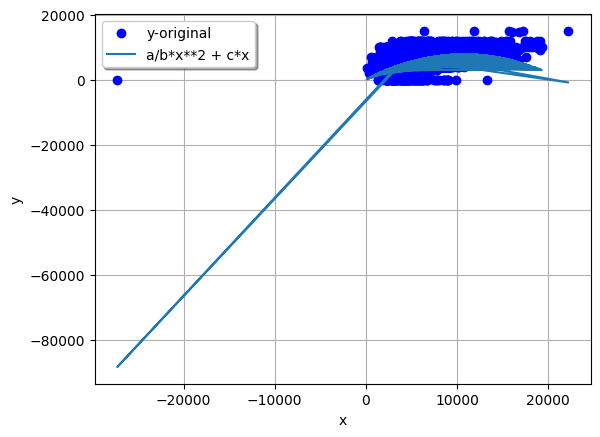

In [932]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [933]:
R219 = r2_score(y, yfit1)
R219

-0.24546353291405487

In [934]:
corr19= np.sqrt(abs(R219))
corr19

0.49544276451882396

##modelo 5

In [935]:
import math
Vars_Indep= df2[["costo_total"]]
Var_Dep= df2["limite_credito"]
x= Vars_Indep
y= Var_Dep

In [936]:
def  func1 (x, a, b, c):
  return a*np.tan(x) + b

parametros, covs= curve_fit(func1, df2["costo_total"], df2["limite_credito"])
parametros

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([4.87920388e-02, 5.92030442e+03, 1.00000000e+00])

In [937]:
parametros, _ = curve_fit(func1, df2["costo_total"], df2["limite_credito"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.tan(x) + b
yfit1

,costo_total
0,5920.408636
1,5920.313161
2,5920.744453
3,5920.744453
4,5920.240376
...,...
22730,5920.352615
22731,5920.342615
22732,5920.222274
22733,5920.277001


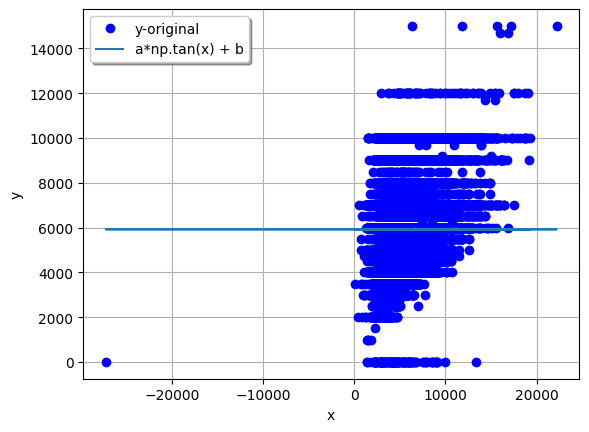

In [938]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [941]:
R220 = r2_score(y, yfit1)
R220

2.1992778509449806e-07

In [940]:
corr20= np.sqrt(abs(R220))
corr20

0.00046896458831610947

In [945]:
nombres_variables = ["R21", "R22", "R23", "R24","R25","R26","R27","R28","R29","R210","R211","R212","R213","R214","R215","R216","R217","R218","R219","R220"]
# Supongamos que también tienes listas de valores para cada variable
valores_R21=R21
valores_R22=R22
valores_R23=R23
valores_R24=R24
valores_R25=R25
valores_R26=R26
valores_R27=R27
valores_R28=R28
valores_R29=R29
valores_R21O=R210
valores_R211=R211
valores_R212=R212
valores_R213=R213
valores_R214=R214
valores_R215=R215
valores_R216=R216
valores_R217=R217
valores_R218=R21
valores_R219 = R219
valores_R220 = R220


# Crear un diccionario donde las claves son los nombres de las variables y los valores son las listas de valores
data = {
    "Variable": nombres_variables,
    "Valor": [valores_R21, valores_R22, valores_R23, valores_R24, valores_R25, valores_R26, valores_R27, valores_R28, valores_R29,
              valores_R21O, valores_R211, valores_R212, valores_R213, valores_R214, valores_R215, valores_R216, valores_R217,
              valores_R218, valores_R219, valores_R220]
}

# Crear un DataFrame a partir del diccionario
df3 = pd.DataFrame(data)

# Imprimir el DataFrame
print(df3)

   Variable         Valor
0       R21  2.950648e-02
1       R22 -4.509246e-02
2       R23 -4.509246e-02
3       R24 -8.681797e-02
4       R25 -4.469659e-02
5       R26  3.449356e-04
6       R27  1.203310e-04
7       R28  3.611098e-03
8       R29 -1.062714e-02
9      R210 -1.103433e-01
10     R211 -8.986190e+00
11     R212  1.694873e-01
12     R213 -8.161131e-01
13     R214 -2.087302e+00
14     R215 -4.976667e+00
15     R216 -2.454635e-01
16     R217  7.255945e-02
17     R218  2.950648e-02
18     R219 -2.454635e-01
19     R220  2.199278e-07
